In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import model
from config import Config

In [25]:
def process_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img / 255
    img = tf.expand_dims(img, 0)

    return img

def process_mask(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_png(img, channels=3)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.resize(img, [56, 56], method='nearest')

    return img

In [3]:
cfg = Config("config_seg_b0_90.yml")
segformer = model.segformer(
    cfg.model.num_classes, 
    cfg.model.kernel_sizes, 
    cfg.model.strides, 
    cfg.model.emb_sizes, 
    cfg.model.reduction_ratios, 
    cfg.model.mlp_expansions, 
    cfg.model.num_heads, 
    cfg.model.depths, 
    cfg.model.decoder_channels, 
    cfg.model.scale_factors, 
    cfg.model.input_shape
)
segformer.load_weights("weights/seg_b0_90.ckpt")

In [97]:
img_path = "validation/data/000000000785.jpg"
mask_path = "validation/mask/000000000785.png"

In [98]:
img = process_image(img_path)
res = segformer(img)
res = np.squeeze(res)
res = np.argmax(res,-1)

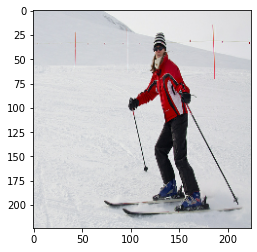

In [106]:
plt.imshow(np.squeeze(img))

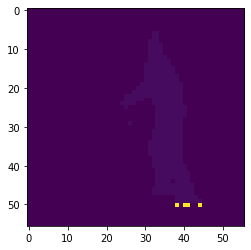

In [99]:
plt.imshow(res)

In [100]:
np.unique(res)

array([ 0,  1, 35], dtype=int64)

In [101]:
mask = process_mask(mask_path)

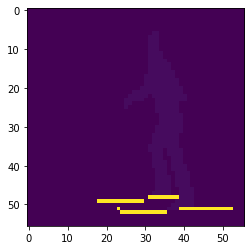

In [102]:
plt.imshow(mask)

In [103]:
np.unique(mask)

array([ 0,  1, 35], dtype=uint8)